<a href="https://colab.research.google.com/github/Sidhtang/FINANCIAL-MODEL-using-machine-learning/blob/main/BTST_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

# Download historical stock price data for TCS
data = yf.download('TCS.NS', start='2020-01-01', end='2022-02-26')

# Calculate short-term and long-term Simple Moving Averages
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Create a column to store the trading signals
data['Signal'] = 0.0

# Generate trading signals
data.loc[data['SMA_20'] > data['SMA_50'], 'Signal'] = 1.0
data.loc[data['SMA_20'] < data['SMA_50'], 'Signal'] = -1.0

# Create a column to store the daily returns
data['Return'] = np.log(data['Close'] / data['Close'].shift(1))

# Calculate the strategy returns
data['Strategy'] = data['Signal'].shift(1) * data['Return']

# Risk Management: Set a stop-loss of 5%
stop_loss = 0.05

# Position Sizing: Set a position size of 10% of the total capital
position_size = 0.1

# Walk-Forward Optimization: Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Initialize the total capital
total_capital = 100000

# Initialize the total returns
total_returns = 0

# Initialize the number of trades
num_trades = 0

# Initialize the winning and losing trades
winning_trades = 0
losing_trades = 0

# Initialize the maximum drawdown
max_drawdown = 0

# Iterate over the testing data
for i in range(len(test_data)):
    # Get the current signal
    signal = test_data['Signal'].iloc[i]

    # Get the current price
    price = test_data['Close'].iloc[i]

    # Calculate the position size
    position = position_size * total_capital

    # Check if the signal is a buy signal
    if signal == 1:
        # Buy the stock
        total_capital -= position
        num_trades += 1

        # Check if the stop-loss is triggered
        if price < (1 - stop_loss) * price:
            # Sell the stock
            total_capital += position
            losing_trades += 1
        else:
            # Hold the stock
            total_returns += test_data['Strategy'].iloc[i]
            winning_trades += 1

    # Check if the signal is a sell signal
    elif signal == -1:
        # Sell the stock
        total_capital += position
        num_trades += 1

        # Check if the stop-loss is triggered
        if price > (1 + stop_loss) * price:
            # Buy the stock
            total_capital -= position
            losing_trades += 1
        else:
            # Hold the cash
            total_returns += test_data['Strategy'].iloc[i]
            winning_trades += 1

    # Update the maximum drawdown
    max_drawdown = max(max_drawdown, (total_capital - total_returns) / total_capital)

# Print the results
print('Total Returns: {:.2f}%'.format(total_returns * 100))
print('Number of Trades: {}'.format(num_trades))
print('Winning Trades (%): {:.2f}%'.format((winning_trades / num_trades) * 100))
print('Losing Trades (%): {:.2f}%'.format((losing_trades / num_trades) * 100))
print('Maximum Drawdown: {:.2f}%'.format(max_drawdown * 100))

[*********************100%%**********************]  1 of 1 completed

Total Returns: -1.91%
Number of Trades: 108
Winning Trades (%): 100.00%
Losing Trades (%): 0.00%
Maximum Drawdown: 100.00%


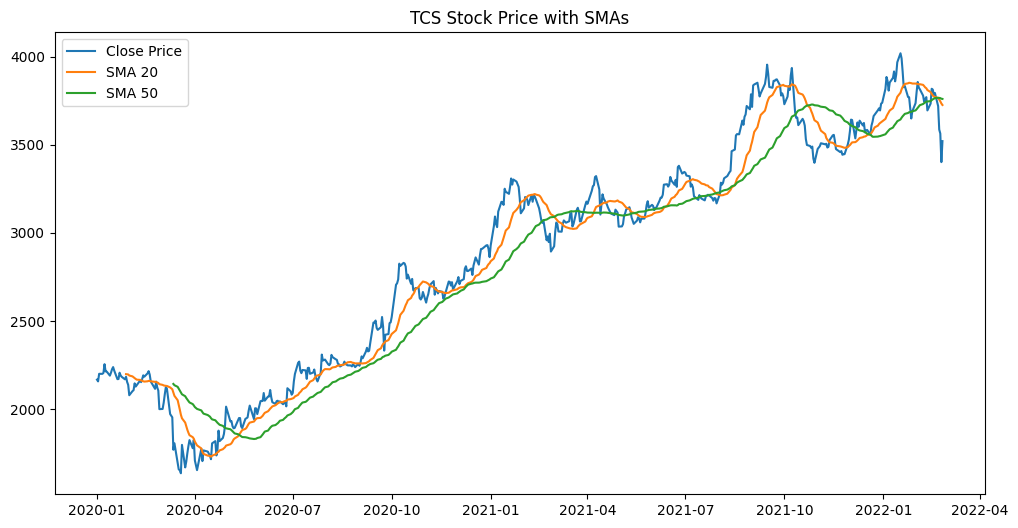

In [2]:
# stock price  with smas
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_20'], label='SMA 20')
plt.plot(data['SMA_50'], label='SMA 50')
plt.legend(loc='best')
plt.title('TCS Stock Price with SMAs')
plt.show()

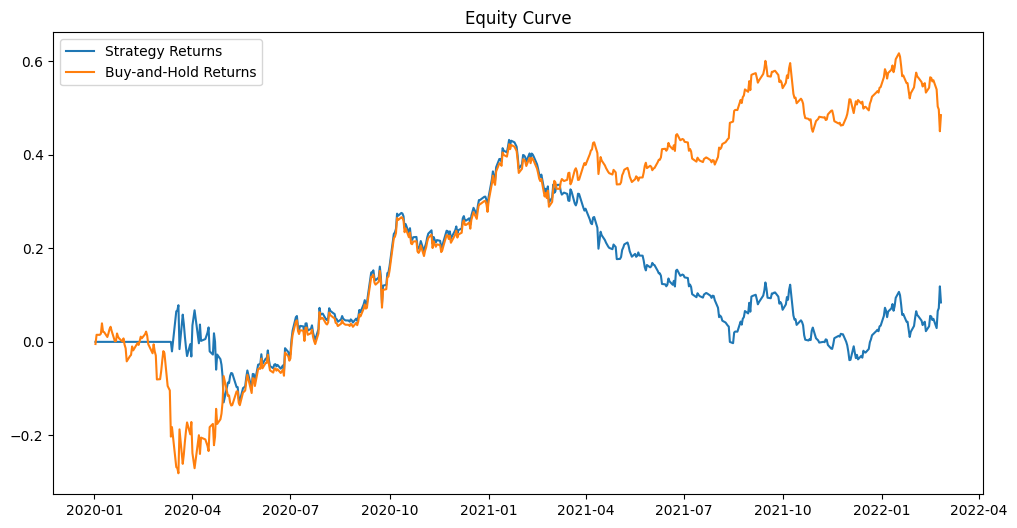

In [3]:
# equity curve
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(data['Strategy']), label='Strategy Returns')
plt.plot(np.cumsum(data['Return']), label='Buy-and-Hold Returns')
plt.legend(loc='best')
plt.title('Equity Curve')
plt.show()